In [21]:
import sys
import os
from mpi4py import MPI
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'

import floatpy.readers.padeops_reader as por
import floatpy.readers.parallel_reader as pdr
import floatpy.utilities.reduction as red
import floatpy.derivatives.compact.compact_derivative as cd
import statistics as stats

directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/256x384x128/'
filename_prefix = directory+'/shearlayer_'

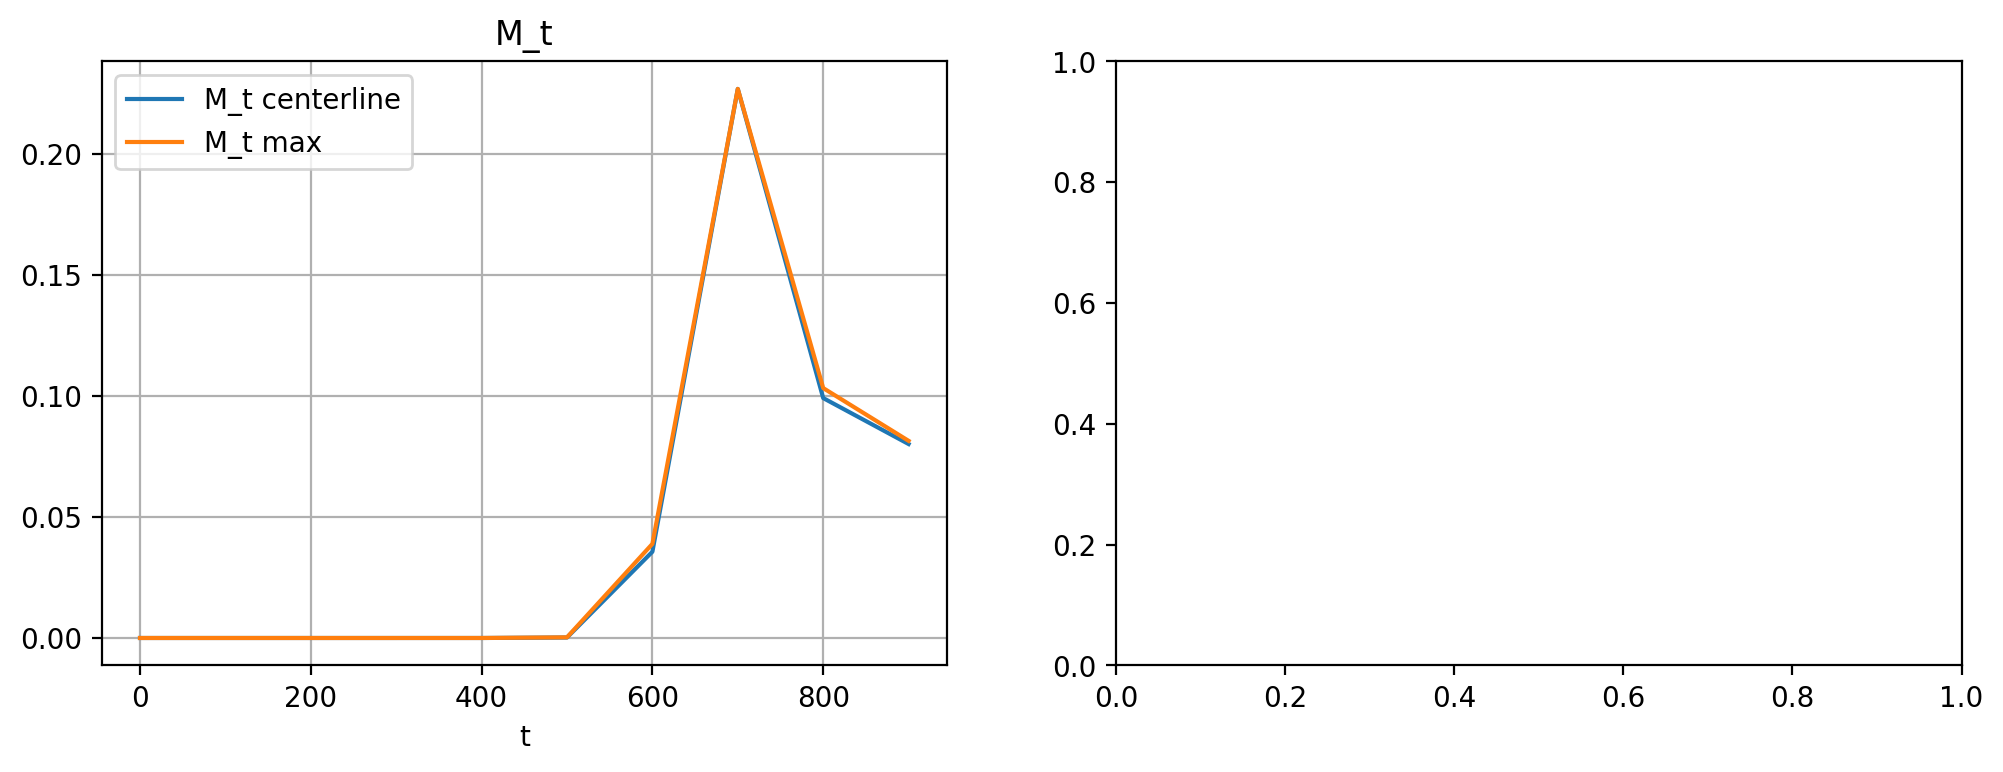

In [22]:
# TKE
fname = filename_prefix+'Mt_growth.dat'
dat = np.fromfile(fname,dtype=float, count=-1, sep=' ')
n = np.size(dat)

nstats=3
dat = np.reshape(dat,[n/nstats,nstats])
time = dat[:,0]
Mt_center = dat[:,1]
Mt_max = dat[:,2]

# Plotting
fig, axarr = plt.subplots(1,2, figsize=(12,4), dpi=200) 
axarr[0].plot(time,Mt_center,label='M_t centerline'); 
axarr[0].plot(time,Mt_max,label='M_t max'); 
axarr[0].grid(True)
axarr[0].set_xlabel('t')
axarr[0].set_title('M_t')
axarr[0].legend()